# Proyecto de Análisis de Datos: Mejora de la Seguridad en la Aviación

## Introducción

Este proyecto de análisis de datos tiene como objetivo principal abordar la problemática de la seguridad en la industria de la aviación, específicamente la prevención de accidentes aéreos. Los accidentes aéreos son eventos imprevistos y altamente indeseados que pueden resultar en daños tanto aeronáuticos como humanos, y su prevención es esencial para la seguridad de los pasajeros y la integridad de las aeronaves.

En este contexto, la Organización de Aviación Civil Internacional (OACI), un organismo de la Organización de las Naciones Unidas, ha iniciado este proyecto en colaboración con una consultora de datos. El objetivo es analizar en profundidad los accidentes aéreos que han ocurrido desde el inicio del siglo XX. Para lograr esto, se utilizará un conjunto de datos sobre accidentes de aviones, y se buscará cruzar esta información con otras fuentes relevantes para obtener una visión más completa de los factores que contribuyen a los accidentes.

Los entregables clave de este proyecto incluyen:

### Análisis Exploratorio de Datos (EDA)

Se realizará un análisis exploratorio de los datos, donde se identificarán valores faltantes, valores atípicos (outliers), y registros duplicados. Este análisis se documentará en un notebook con visualizaciones claras y conclusiones detalladas.

### Dashboard Interactivo

Se desarrollará un dashboard interactivo que permitirá explorar los datos de accidentes aéreos de manera detallada. Este dashboard incluirá filtros que facilitarán la selección de datos específicos para un análisis más profundo.

### Análisis y Conclusiones

Se realizarán análisis en profundidad utilizando los datos y visualizaciones disponibles en el dashboard. Se buscará comprender las causas y tendencias de los accidentes aéreos y se propondrán medidas para mejorar la seguridad en la aviación.

### Indicadores Clave de Desempeño (KPIs)

Se medirá el KPI principal, que busca evaluar la disminución de un 10% en la tasa de fatalidad de la tripulación en los últimos 10 años en comparación con la década anterior. Además, se propondrá, medirá y graficará un segundo KPI relevante para la temática.

### Repositorio en GitHub

Todo el trabajo se documentará en un repositorio de GitHub que incluirá un README principal con detalles sobre el proyecto, la estructura del repositorio y un reporte de análisis basado en los resultados obtenidos en el dashboard.

**Este proyecto busca contribuir significativamente a la seguridad en la aviación al proporcionar información valiosa y análisis detallados que puedan guiar a la OACI y otras partes interesadas en la toma de decisiones informadas para prevenir accidentes aéreos en el futuro.**

## Objetivo

## Hipótesis

### Hipótesis 1

**La disminución de un 10% en la tasa de fatalidad de la tripulación en los últimos 10 años, en comparación con la década anterior, tendrá un impacto significativo en la seguridad de la industria de la aviación.**

### Hipótesis 2

**Existe una relación significativa entre las diferentes categorías de accidentes aéreos que puede ayudar a determinar una disminución de accidentes en la última década en comparación con la década anterior.**

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
df = pd.read_csv('datasets/AccidentesAviones.csv')

## Comprobación de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [4]:
df.head(10)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
5,5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,?,?,Zeppelin L-2 (airship),?,?,28,?,?,28,?,?,0,Hydrogen gas which was being vented was sucked...
6,6,"March 05, 1915",0100,"Tienen, Belgium",Military - German Navy,?,?,Zeppelin L-8 (airship),?,?,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
7,7,"September 03, 1915",1520,"Off Cuxhaven, Germany",Military - German Navy,?,?,Zeppelin L-10 (airship),?,?,19,?,?,19,?,?,0,"Exploded and burned near Neuwerk Island, when..."
8,8,"July 28, 1916",?,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),?,?,20,?,?,20,?,?,0,"Crashed near the Black Sea, cause unknown."
9,9,"September 24, 1916",0100,"Billericay, England",Military - German Navy,?,?,Zeppelin L-32 (airship),?,?,22,?,?,22,?,?,0,Shot down by British aircraft crashing in flames.


In [5]:
# Vemos como se distribuyen los datos originales
# Consideremos que esto solo tomará los valores numéricos
df.describe()

,Unnamed: 0
count,5008.000000
mean,2503.500000
std,1445.829404
min,0.000000
25%,1251.750000
50%,2503.500000
75%,3755.250000
max,5007.000000


**Podemos determinar que las columnas con valores no numéricos o valores faltantes (como '?') se excluyen automáticamente de este cálculo, será necesario convertir los datos antes de poder aplicar el método describe() correctamente.**

### Preparar los datos

**Este procedimiento implica una serie de pasos, y el primero de ellos consiste en la evaluación del formato de los datos. Esta evaluación abarca aspectos como el tipo de datos con el que trabajaremos y la forma en que accederemos a ellos. Cada uno de estos pasos será explicado detalladamente en el momento de su aplicación.**

### Revisión de columnas

In [6]:
# Veamos los nombres de las columnas originales
df.columns.tolist()

['Unnamed: 0',
 'fecha',
 'HORA declarada',
 'Ruta',
 'OperadOR',
 'flight_no',
 'route',
 'ac_type',
 'registration',
 'cn_ln',
 'all_aboard',
 'PASAJEROS A BORDO',
 'crew_aboard',
 'cantidad de fallecidos',
 'passenger_fatalities',
 'crew_fatalities',
 'ground',
 'summary']

In [7]:
# Estandarizamos los nombres de las columnas en minúsculas y reemplazar los espacios en blanco por guiones bajos (_) en el DataFrame 'df'. Esto facilita la manipulación y consulta de las columnas, manteniendo una convención de nomenclatura consistente.
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
# Evaluar nulos
df.isnull().sum()

unnamed:_0                0
fecha                     0
hora_declarada            0
ruta                      0
operador                  0
flight_no                 0
route                     1
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
pasajeros_a_bordo         0
crew_aboard               0
cantidad_de_fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

**Podemos ver que no tenemos valores nulos (A excepción de un unico nulo en 'route'), sin embargo tenemos valores '?'**

In [9]:
# Evaluamos los valores '?' por cada columna
(df == '?').sum()

unnamed:_0                   0
fecha                        0
hora_declarada            1504
ruta                         5
operador                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
pasajeros_a_bordo          221
crew_aboard                219
cantidad_de_fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

### Datos ausentes

**En este caso un valor ausente y un valor por determinar contribuyen con una cantidad de información equivalente. La única diferencia radica en que los registros que contienen el valor '?', serán considerados como datos ausentes**

**La mayoría de las columnas presentan valores faltantes, específicamente, 15 de las 17 columnas disponibles. Dentro de estas, destacan las columnas de hora_declarada, flight_no, route, registration, cn_ln, pasajeros_a_bordo, crew_aboard, passenger_fatalities y crew_fatalities como las que contienen la mayor cantidad de datos ausentes. Estas columnas requerirán un análisis especial para su manejo, pero a través del estudio de otros valores relacionados, podremos llegar a conclusiones sobre cómo abordar esta falta de datos.**

**Para comenzar, se llevará a cabo una revisión y corrección de las demás columnas antes mencionadas.**

#### hora_declarada

In [10]:
# Veamos cuantos elementos nulos('?') existen
df['hora_declarada'].value_counts()

hora_declarada
?       1504
1500      35
1400      30
1100      30
1700      29
        ... 
2129       1
1002       1
1151       1
0909       1
1914       1
Name: count, Length: 1217, dtype: int64

**Tenemos 1504 elementos con valor '?'**

**Valores diferentes 1217**

In [11]:
# Crea una máscara booleana para los valores que no cumplen con el patrón de 4 dígitos
mask = ~(df['hora_declarada'].str.match(r'\d{4}$') | (df['hora_declarada'] == '?'))

# Filtra el DataFrame original utilizando la máscara
result = df.loc[mask, 'hora_declarada']

print(f'Total de elementos encontrados: {len(result)}')

result

Total de elementos encontrados: 220


84      c 18:00
87      c 02:30
95      c 12:00
117     c 13:15
132       10:00
         ...   
4380      02:30
4385      11:23
4531      05:30
4742      0500Z
5006      11:30
Name: hora_declarada, Length: 220, dtype: object

In [12]:
# Limpiamos los datos para estandarizar la hora en formato militar
df['hora_declarada'] = df['hora_declarada'].str.replace(r'[: cZ;]', '', regex=True)

df['hora_declarada'] = df['hora_declarada'].str.replace(r'(\b\d{3}\b)', r'0\1', regex=True)

df['hora_declarada'] = df['hora_declarada'].replace('?', np.nan)


In [13]:
# Comprobamos que la limpieza se haya efectuado correctamente
mask = ~(df['hora_declarada'].astype(str).str.match(r'^\d{4}$')) & df['hora_declarada'].notna()


print(f'Total de elementos encontrados: {len(df.loc[mask, "hora_declarada"])}')

Total de elementos encontrados: 0


In [14]:
# Calculamos el porcerntaje total de valores ausentes con respecto al total de registros
df['hora_declarada'].isna().sum() / len(df['hora_declarada'])

0.3003194888178914

In [15]:
df['hora_declarada'].describe()

count     3504
unique    1062
top       1500
freq        38
Name: hora_declarada, dtype: object

**Hemos estandarizado los valores en formato de hora militar con el fin de garantizar su correcta utilización. Hasta el momento, no hemos identificado una correlación que nos permita realizar una imputación precisa de estos datos. Por lo tanto, es necesario llevar a cabo un análisis más exhaustivo. Además, observamos que el porcentaje de valores faltantes en esta columna asciende al 30%. En consecuencia, no es apropiado eliminarlos sin previamente llevar a cabo un análisis detenido.**

#### flight_no

In [16]:
# Veamos cuantos elementos nulos('?') existen
(df['flight_no'] == '?').sum()

3682

**Tenemos 3682 elementos con valor '?'**

In [17]:
# Veamos cuantos valores diferentes hay
df['flight_no'].value_counts()

flight_no
?        3682
-          36
1          11
101         9
6           7
         ... 
138         1
124         1
1-10        1
4422        1
SJ182       1
Name: count, Length: 893, dtype: int64

In [18]:
# Remplazamos los valores - por '?'
df['flight_no'] = df['flight_no'].replace('-', '?')

In [19]:
# Creamos los valores ausentes a partir de los '?'
df['flight_no'] = df['flight_no'].replace('?', np.nan)

In [20]:
# Comprobamos el estado de la columna
df['flight_no'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: flight_no
Non-Null Count  Dtype 
--------------  ----- 
1290 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [21]:
# Veamos cuantos valores diferentes hay
df['flight_no'].value_counts()

flight_no
1        11
101       9
901       7
6         7
4         7
         ..
1036      1
696       1
446       1
631       1
SJ182     1
Name: count, Length: 891, dtype: int64

In [22]:
# Comprobamos el porcentaje de numero ausentes
(df['flight_no'].isna()).sum() / len(df['flight_no'])

0.7424121405750799

**En la columna 'flight_no', hemos identificado 3,682 valores ausentes, representados por '?', y una variedad de datos no numéricos, lo que dificulta su análisis. El porcentaje de valores ausentes en relación con el total de registros es del 74%, destacando la necesidad de abordar la limpieza y estandarización antes de un análisis más profundo.**

#### route

In [23]:
# Veamos cuantos elementos nulos('?') existen
(df['route'] == '?').sum()

762

In [24]:
# Revisamos el nulo exiswtente
df['route'].isna().sum()

1

In [25]:
# Estandarizamos los datos
# Remplazamos el nulo temporalmente por '?'
df['route'] = df['route'].fillna('?')

# Reemplazamos  '–' por '-'
df['route'] = df['route'].str.replace('–', '-')

In [26]:
df[df['route'].str.contains('-')]

,unnamed:_0,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary
32,32,"December 11, 1919",NaN,"Catherham, Surrey, UK",Aircraft Travel Transport,NaN,Paris - Hounslow,de Havilland DH-4,G-EAHF,?,1,1,1,1,1,1,0,Crashed in a field while attemptting to land.
34,34,"March 30, 1920",NaN,"Newark, New Jersey",US Aerial Mail Service,NaN,Washington - Newark,De Havilland DH-4,72,?,1,0,1,1,0,1,0,George Sherlock was killed when his mail plane...
49,49,"December 14, 1920",1215,"London, England",Handley Page Transport,NaN,London - Paris,Handley Page HP-16,G-EAMA,HP-25,8,6,2,4,2,2,0,The plane failed to gain altitude after taking...
61,61,"September 06, 1921",NaN,"Paris, France",Franco-Roumaine,NaN,Warsaw - Prague - Strasbourg - Paris,Potez IX,F-ADCD,160,5,4,1,5,4,1,0,Crashed while making an approach to Le Bourget...
62,62,"December 05, 1921",NaN,"Near Murchinson River, Australia",West Australian Airways,NaN,Geraldton - Derby,Bristol 28 Tourer,G-AUDI,6116,2,0,2,2,0,2,0,On approach to Geraldton the plane crashed nea...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,5001,"January 09, 2021",1440,"Near Jakarta, Indonesia",Sriwijaya Air,SJ182,Jakarta - Pontianak,Boeing 737-524,PK-CLC,27323/2616,62,56,6,62,56,6,0,Sriwijaya Air flight 182 was climbing through ...
5002,5002,"March 02, 2021",1705,"Pieri, Sudan",South Sudan Supreme Airlines,NaN,Pieri - Yuai,Let L-410UVP-E,HK-4274,902525,10,8,2,10,8,2,0,One of the engines on the aircraft failed 10 m...
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,NaN,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",1130,"Patikul, Sulu, Philippines",Military - Philippine Air Force,NaN,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [27]:
# Asignamos el valor 'no_category' a los registros con valor '?'
df['route'] = df['route'].apply(lambda x: 'no_category' if x == '?' else x)

In [28]:
len(df[df['route'].str.contains('-')])

4000

In [29]:
df['route'].value_counts()

route
no_category                             763
Training                                 96
Sightseeing                              31
Test flight                              23
Sao Paulo - Rio de Janeiro                7
                                       ... 
Temuco - Santiago                         1
Hong Kong - Tainan AFB                    1
Fort Lamy, Chad - Marseilles, France      1
McChord - Lawton                          1
Petropavlovsk - Palana                    1
Name: count, Length: 3837, dtype: int64

**Después de la limpieza y estandarización de la columna 'route' en el conjunto de datos, se observaron 4,000 registros categorizados como 'commercial', 763 como 'no_category', y varias categorías adicionales. Esto nos permitió una mejor comprensión de los datos y facilitó su análisis.**

#### all_aboard

In [30]:
# Buscamos los valores que no sean digito o que sean diferentes de '?'
len(df[~df['all_aboard'].str.isdigit() & (df['all_aboard'] != '?')])

0

In [31]:
# Remplazamos los valores '?' por NaN
df['all_aboard'] = df['all_aboard'].replace('?', np.nan)

In [32]:
# Mostramos los valores NaN
print(f'Valores totales ausentes: {len(df[df["all_aboard"].isna()])}')
df[df['all_aboard'].isna()]

Valores totales ausentes: 17


,unnamed:_0,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary
26,26,"July 21, 1919",1655,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,NaN,Shuttle,FD Type Dirigible,?,?,NaN,?,?,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi..."
103,103,"September 07, 1925",NaN,"Toul, France",CIDNA,NaN,no_category,Spad 33,?,?,NaN,?,?,?,?,?,?,?
347,347,"August 10, 1934",NaN,"Ningbo, China",China National Aviation Corporation,NaN,no_category,Sikorsky S-38B,?,?,NaN,?,?,?,?,?,?,?
384,384,"August 13, 1935",NaN,"Hangow, China",China National Aviation Corporation,NaN,no_category,Sikorsky S-38B,NV40V,?,NaN,?,?,?,?,?,?,Destoryed in a storm.
451,451,"December 26, 1936",NaN,"Nanking, China",China National Aviation Corporation,NaN,no_category,Douglas DC-2,NC14269,?,NaN,?,?,?,?,?,?,?
652,652,"October 01, 1942",NaN,"Kunming, China",China National Aviation Corporation,NaN,no_category,Douglas C-47,69,?,NaN,?,?,?,?,?,?,Crashed while attempting to land after losing ...
754,754,"November 09, 1944",NaN,"Seljord, Norway",Military - U.S. Army Air Corps,NaN,no_category,?,42-52196,?,NaN,?,?,?,?,?,?,?
854,854,"March 18, 1946",NaN,"Between Chungking and Shanghai, China",China National Aviation Corporation,NaN,Chunking - Shanghai,?,139,?,NaN,?,?,?,?,?,?,Disappeared while en route. Plane never located.
1231,1231,"January 20, 1951",NaN,"Huilyo, Peru",Military - TAM,NaN,no_category,Douglas DC-3,?,?,NaN,?,?,16,?,?,?,?
1362,1362,"December 22, 1952",NaN,"Damascus, Syria",Syrian Air,NaN,no_category,Douglas DC-3,?,?,NaN,?,?,9,?,?,?,?


#### summary

In [33]:
# Evaluamos los valores ausentes
print(f'Valores totales ausentes {len(df[df["summary"] == "?"])}')

df[df['summary'] == '?']

Valores totales ausentes 59


,unnamed:_0,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary
28,28,"October 02, 1919",NaN,"Newcastle, England",Aircraft Transport and Travel,NaN,no_category,De Havilland DH-4,?,?,1,0,1,1,0,1,0,?
59,59,"August 14, 1921",NaN,"Toulouse, France",Aeropostale,NaN,no_category,Breguet 14,F-ALBI,?,2,?,?,2,?,?,0,?
103,103,"September 07, 1925",NaN,"Toul, France",CIDNA,NaN,no_category,Spad 33,?,?,NaN,?,?,?,?,?,?,?
106,106,"November 14, 1925",NaN,"Off Boulogne-sur-Mer, France",Air Union,NaN,no_category,Farman F-60 Goliath,F-FHMY,?,2,?,?,2,?,?,0,?
256,256,"July 14, 1931",NaN,"Temora, Australia",Australian Aerial Services,NaN,no_category,Lasco Lascowl,VH-UGF,3,2,0,2,2,0,2,0,?
257,257,"July 21, 1931",NaN,"Centralia, Illinois",American Airways,NaN,no_category,Pitcairn PA-6 Mailwing,?,?,1,0,1,1,0,1,0,?
264,264,"October 14, 1931",NaN,Brazil,Syndicato Condor,NaN,no_category,Dornier Wal,P-BALSA,107,3,0,3,3,0,3,0,?
321,321,"October 31, 1933",1120,"Etobon, France",Air France,NaN,Zurich - Basel - Paris,Farman F-301,F-AJMI,04,5,2,3,2,1,1,0,?
331,331,"January 20, 1934",NaN,"Carombe, France",Air France,NaN,no_category,Breguet 280T,F-AJKX,?,2,?,?,2,?,?,0,?
333,333,"February 26, 1934",NaN,"Rio de Oro, Morocco",Air France,NaN,no_category,Latécoère 28,F-AJPA,925,6,?,?,1,?,?,0,?


#### all_aboard, pasajeros_a_bordo, crew_aboard, cantidad_de_fallecidos,passenger_fatalities, crew_fatalities, ground, summary

In [34]:
# Cambiamos todos los valores de estas columnas de '?' por 0
columns_to_correct = ['all_aboard', 'pasajeros_a_bordo', 'crew_aboard', 'cantidad_de_fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

for column in columns_to_correct:
    df.loc[df[column] == '?', column] = 0

# Cambiamos los valores '?' por NaN
df.loc[df['summary'] == '?', 'summary'] = np.nan

## Correción de datos

In [35]:
# Renombramos la columna "Unnamed: 0" a "index"
df = df.rename(columns={'unnamed:_0': 'index'})

#### fecha

In [36]:
# Convertimos las fechas
df['fecha'] = pd.to_datetime(df['fecha'], format='%B %d, %Y', errors='coerce')

# Contar cuántos valores no se convirtieron correctamente
df['fecha'].isna().sum()

0

In [37]:
df['fecha']

0      1908-09-17
1      1909-09-07
2      1912-07-12
3      1913-08-06
4      1913-09-09
          ...    
5003   2021-03-28
5004   2021-05-21
5005   2021-06-10
5006   2021-07-04
5007   2021-07-06
Name: fecha, Length: 5008, dtype: datetime64[ns]

#### hora_declarada

In [38]:
# Convertimos las horas marciales en formato 'HHMM' a objetos time
df['hora_declarada'] = pd.to_datetime(df['hora_declarada'], format='%H%M', errors='coerce').dt.time

In [39]:
df['hora_declarada']

0       17:18:00
1            NaT
2       06:30:00
3            NaT
4       18:30:00
          ...   
5003    18:35:00
5004    18:00:00
5005    08:00:00
5006    11:30:00
5007    15:00:00
Name: hora_declarada, Length: 5008, dtype: object

#### route

In [40]:
# Comprobamos los registros que contienen un '-'
# df[~df['route'].str.contains('-')]['route'].value_counts()
filtered_df = df[~df['route'].str.contains('-') & (df['route'] != '?')]['route']

# Mostramos los elementos totales encontrados
print(f'Total de elementos encontrados {len(filtered_df)}')

# Calcula el conteo de valores únicos y sus recuentos
value_counts = filtered_df.value_counts()

# Ordena los totales de registros de forma descendente
value_counts = value_counts.sort_values(ascending=False)

# Imprimimos numero total de categorias

# Itera a través de los valores y sus recuentos y muestra cada uno
for value, count in value_counts.items():
    print(f'{value}\t->\t{count}')

Total de elementos encontrados 1008
no_category	->	763
Training	->	96
Sightseeing	->	31
Test flight	->	23
Test	->	6
Demonstration	->	4
Patrol	->	3
Survey flight	->	3
Military exercise	->	2
Shuttle	->	2
Air Show	->	2
Test Flight	->	2
Training flight	->	2
Training exercise	->	2
Positioning	->	2
Local sightseeing	->	2
Skydiving	->	2
Military exercises	->	2
Prague Leipzig Essen Amsterdam Rotterdam	->	1
test flight	->	1
14099	->	1
Supply mission	->	1
Unalakleet and Nome	->	1
Radio surveillance mission	->	1
Scrampton RAF Station, England	->	1
Hobart Melbourne	->	1
Perth  Adelaide  Melbourne e	->	1
San José  San Isidro de El General	->	1
Reconnaissance	->	1
England to Australia	->	1
Demonistration	->	1
Durango  Zapotes	->	1
Survey	->	1
Movie set	->	1
Traing	->	1
Sightseeing over Rotterdam	->	1
Reconnaissance flight	->	1
Maintenance flight	->	1
Patrol Flight	->	1
Air show	->	1
Airshow	->	1
Otis AFB	->	1
Pleiku  Qui Nhon	->	1
Exercises	->	1
Testing	->	1
Delivery flight	->	1
Oslo, Norway, New Yo

In [41]:
# Asignamos la etiqueta 'commercial' todos los valores que contengan '-'
df.loc[df['route'].str.contains('-'), 'route'] = 'commercial'

In [42]:
category_map = {
    'Training': 'training',
    'Training flight': 'training',
    'Training exercise': 'training',
    'Traing': 'training',
    'Militiary training': 'training',
    'Training/Aranchi': 'training',
    'Sightseeing': 'sightseeing',
    'Local sightseeing': 'sightseeing',
    'Sightseeing over Rotterdam': 'sightseeing',
    'Sighteeing': 'sightseeing',
    'Sight seeing': 'sightseeing',
    'Sightseeing Fentress Airpark': 'sightseeing',
    'Sightseeing Charter': 'sightseeing',
    'Test flight': 'testing',
    'Test Flight': 'testing',
    'test flight': 'testing',
    'Test': 'testing',
    'Demonstration': 'demonstration',
    'Demonistration': 'demonstration',
    'Demonstration flight': 'demonstration',
    'Patrol': 'patrol',
    'Patrol Flight': 'patrol',
    'Survey flight': 'survey',
    'Survey': 'survey',
    'Shuttle': 'shuttle',
    'Air Show': 'air_show',
    'Air show': 'air_show',
    'Airshow': 'air_show',
    'Skydiving': 'skydiving',
    'Parachuting': 'skydiving',
    'Positioning': 'positioning',
    'Military exercises': 'military',
    'Military exercise': 'military',
    'Exercises': 'military',
    'Local': 'local',
    'no_category': 'no_category',
    'commercial': 'commercial',
}

df['category'] = df['route'].map(category_map)

#### ac_type

In [43]:
df[df['category'] == 'commercial']['ac_type'].value_counts()

ac_type
Douglas DC-3                                284
de Havilland Canada DHC-6 Twin Otter 300     66
Douglas C-47A                                51
Douglas C-47                                 49
Douglas DC-4                                 37
                                           ... 
Boeing B-720-040B                             1
Lockheed 1049G-55 Super Constellation         1
Handley Page Dart Herald 207                  1
Douglas DC--3                                 1
Antonov An 26B-100                            1
Name: count, Length: 2043, dtype: int64

In [44]:
df[df['ac_type'] == 'Douglas DC-3']['category'].value_counts()

category
commercial     284
no_category     42
training         3
testing          1
sightseeing      1
Name: count, dtype: int64

In [45]:
commercial_ac_types = df[df['category'] == 'commercial']['ac_type'].unique()

commercial_ac_types

array(['de Havilland DH-4', 'De Havilland DH-4', 'Handley Page HP-16',
       ..., 'Let L-410UVP-E', 'Beechcraft 1900D', 'Antonov An 26B-100'],
      dtype=object)

In [46]:
# Obtenemos todos los registros sin categoría sin tomar en cuenta ac_type ='?', ya que será nuestra llave para relacionar
df[(df['category'] == 'no_category') & (df['ac_type'] != '?')]

,index,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary,category
3,3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,NaN,no_category,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,no_category
4,4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,no_category,Zeppelin L-1 (airship),?,?,20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...,no_category
5,5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,no_category,Zeppelin L-2 (airship),?,?,28,0,0,28,0,0,0,Hydrogen gas which was being vented was sucked...,no_category
6,6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,NaN,no_category,Zeppelin L-8 (airship),?,?,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...,no_category
7,7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,NaN,no_category,Zeppelin L-10 (airship),?,?,19,0,0,19,0,0,0,"Exploded and burned near Neuwerk Island, when...",no_category
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,4842,2012-06-11,NaT,"Near Serov, Russia",Illegal flight,NaN,no_category,Antonov An-2R,RA-40312,1G221-48,13,12,1,13,12,1,0,The plane disappeared after being taken on an ...,no_category
4847,4847,2012-09-28,06:15:00,"Kathmandu, Nepal",Sita Air,NaN,no_category,Dornier 228-202,9N-AHA,8123,19,16,3,19,16,3,0,The plane crash landed on the bank of the Mano...,no_category
4848,4848,2012-10-07,12:00:00,"Near Omdurman, Sudan",Military - Sudanese Air Force,NaN,no_category,Antonov An-12BP,ST-ASA,402010,22,16,6,15,0,0,0,"The transport, carrying military personnel and...",no_category
4878,4878,2013-11-29,20:25:00,Glasgow Scotland,Bond Air Services Ltd.,NaN,no_category,Eurocopter EC135 T2,G-SPAO,0546,3,2,1,3,2,1,5,The police helicopter crashed into the roof of...,no_category


In [47]:
# Comprobamos cuantos elementos se encuentran en la lista de aviones comerciales
df[
    (df['category'] == 'no_category') & 
    (df['ac_type'] != '?')
][
    df[
        (df['category'] == 'no_category') & 
        (df['ac_type'] != '?')
    ]['ac_type'].isin(commercial_ac_types)
]

,index,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary,category
23,23,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,no_category,De Havilland DH-4,97,?,1,0,1,1,0,1,0,Carl Smith was killed when his mail plane feet...,no_category
24,24,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,no_category,De Havilland DH-4,61,?,1,0,1,1,0,1,0,Caught fire in midair. The pilot leaped from t...,no_category
25,25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,no_category,De Havilland DH-4,82,?,1,0,1,1,0,1,0,The mail plane crashed under unknown circumsta...,no_category
28,28,1919-10-02,NaN,"Newcastle, England",Aircraft Transport and Travel,NaN,no_category,De Havilland DH-4,?,?,1,0,1,1,0,1,0,NaN,no_category
30,30,1919-10-20,NaN,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,NaN,no_category,De Havilland DH-4,G-EAHG,?,0,0,1,0,0,0,0,Crashed into the sea while attempting to land ...,no_category
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,4736,2009-07-19,11:50:00,"Kandahar Airport, Afghanistan",Vertical-T Air,NaN,no_category,Mil Mi-8,?,?,21,0,0,16,0,0,0,A civilian contractor's helicopter crashed whi...,no_category
4786,4786,2010-10-06,NaT,"Rasht Valley, Tajikistan",Military - Tajik National Guard,NaN,no_category,Mi-8,?,?,28,0,0,28,0,0,0,The military helicopter crashed after hitting ...,no_category
4791,4791,2010-11-25,12:07:00,"Strezhevoy, Russia",NARZ,NaN,no_category,Mil Mi-8T,RA-22376,7257,10,0,0,7,0,0,0,"The helicopter, which was delivering workers t...",no_category
4842,4842,2012-06-11,NaT,"Near Serov, Russia",Illegal flight,NaN,no_category,Antonov An-2R,RA-40312,1G221-48,13,12,1,13,12,1,0,The plane disappeared after being taken on an ...,no_category


In [48]:
# Comprobamos el numero de registros sin categoria
df[df['category'] == 'no_category']

,index,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary,category
3,3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,NaN,no_category,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,no_category
4,4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,no_category,Zeppelin L-1 (airship),?,?,20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...,no_category
5,5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,no_category,Zeppelin L-2 (airship),?,?,28,0,0,28,0,0,0,Hydrogen gas which was being vented was sucked...,no_category
6,6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,NaN,no_category,Zeppelin L-8 (airship),?,?,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...,no_category
7,7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,NaN,no_category,Zeppelin L-10 (airship),?,?,19,0,0,19,0,0,0,"Exploded and burned near Neuwerk Island, when...",no_category
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,4842,2012-06-11,NaT,"Near Serov, Russia",Illegal flight,NaN,no_category,Antonov An-2R,RA-40312,1G221-48,13,12,1,13,12,1,0,The plane disappeared after being taken on an ...,no_category
4847,4847,2012-09-28,06:15:00,"Kathmandu, Nepal",Sita Air,NaN,no_category,Dornier 228-202,9N-AHA,8123,19,16,3,19,16,3,0,The plane crash landed on the bank of the Mano...,no_category
4848,4848,2012-10-07,12:00:00,"Near Omdurman, Sudan",Military - Sudanese Air Force,NaN,no_category,Antonov An-12BP,ST-ASA,402010,22,16,6,15,0,0,0,"The transport, carrying military personnel and...",no_category
4878,4878,2013-11-29,20:25:00,Glasgow Scotland,Bond Air Services Ltd.,NaN,no_category,Eurocopter EC135 T2,G-SPAO,0546,3,2,1,3,2,1,5,The police helicopter crashed into the roof of...,no_category


In [49]:
# Creamos la funcion para aplicar el proceso a todas las categorias y categorizar las que no la tienen
def update_category(df, category_list):
    for category in category_list:
        category_values = df[df['category'] == category]['ac_type'].unique()
        df.loc[
            (df['category'] == 'no_category') &
            (df['ac_type'] != '?') &
            df['ac_type'].isin(category_values),
            'category'
        ] = category

# Lista de categorías a actualizar
categories_to_update = [
    'commercial',
    'training',
    'sightseeing',
    'testing',
    'demonstration',
    'patrol',
    'survey',
    'shuttle',
    'air_show',
    'skydiving',
    'positioning',
    'military',
    'local',
]

# Llamamos a la función para actualizar las categorías en el DataFrame
update_category(df, categories_to_update)

In [50]:
df[df['category'] == 'no_category']

,index,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary,category
3,3,1913-08-06,NaT,"Victoria, British Columbia, Canada",Private,NaN,no_category,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,no_category
4,4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,NaN,no_category,Zeppelin L-1 (airship),?,?,20,0,0,14,0,0,0,The airship flew into a thunderstorm and encou...,no_category
5,5,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,no_category,Zeppelin L-2 (airship),?,?,28,0,0,28,0,0,0,Hydrogen gas which was being vented was sucked...,no_category
6,6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,NaN,no_category,Zeppelin L-8 (airship),?,?,41,0,41,17,0,17,0,Crashed into trees while attempting to land af...,no_category
7,7,1915-09-03,15:20:00,"Off Cuxhaven, Germany",Military - German Navy,NaN,no_category,Zeppelin L-10 (airship),?,?,19,0,0,19,0,0,0,"Exploded and burned near Neuwerk Island, when...",no_category
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,4813,2011-08-06,NaT,"Tangi Valley, Afghanistan",Military - U.S. Army,NaN,no_category,Boeing CH-47 Chinook,?,?,38,0,0,38,0,0,0,"Thirty-eight people, including 31 U.S. special...",no_category
4833,4833,2012-03-16,10:45:00,"Kabul, Afghanistan",Military - Turkish Army (NATO),NaN,no_category,Sikorsky S-70A-28,10981,?,12,0,0,12,0,0,4,The helicopter crashed on the outskirts of Kab...,no_category
4847,4847,2012-09-28,06:15:00,"Kathmandu, Nepal",Sita Air,NaN,no_category,Dornier 228-202,9N-AHA,8123,19,16,3,19,16,3,0,The plane crash landed on the bank of the Mano...,no_category
4878,4878,2013-11-29,20:25:00,Glasgow Scotland,Bond Air Services Ltd.,NaN,no_category,Eurocopter EC135 T2,G-SPAO,0546,3,2,1,3,2,1,5,The police helicopter crashed into the roof of...,no_category


In [51]:
# Buscamos todos los vuelos militares
df.loc[df['operador'].str.contains('ilitar', case=False, na=False), 'category'] = 'military'
df.loc[df['operador'].str.contains('iliti', case=False, na=False), 'category'] = 'military'
df.loc[df['operador'].str.contains('orce', case=False, na=False), 'category'] = 'military'
df.loc[df['operador'].str.contains('uerza', case=False, na=False), 'category'] = 'military'

# Buscamos todos los vuelos de servicio de correo
df.loc[df['operador'].str.contains('ail', case=False, na=False), 'category'] = 'mail_service'

# Buscamos todos los vuelos de servicio de taxi
df.loc[df['operador'].str.contains('axi', case=False, na=False), 'category'] = 'taxi'

# Buscamos todos los vuelos de helicoptero
df.loc[df['operador'].str.contains('elicop', case=False, na=False), 'category'] = 'helicopter'

# Buscamos todos los vuelos comerciales
df.loc[df['operador'].str.contains('irline', case=False, na=False), 'category'] = 'commercial'
df.loc[df['operador'].str.contains('Air', case=False, na=False), 'category'] = 'commercial'

# Buscamos todos los vuelos comerciales
df.loc[df['operador'].str.contains('ivat', case=False, na=False), 'category'] = 'private'

# Buscamos todos los vuelos transporte
df.loc[df['operador'].str.contains('ivat', case=False, na=False), 'category'] = 'private'

In [52]:
# Mostramos todos los operadores de los registros sin categoria

for index, row in df[df['category'] == 'no_category'].iterrows():
    print(row['operador'])

?
Compañia Colombiana de Navegación Aérea
Handley Page Transport
Campagnie France Roumaine
CIDNA
Deutsche Lufthansa
MALERT
Bodensee Aerolloyd
Ukvozduchput
Deutsche Lufthansa
Rubner Flying Service
Australian Aerial Services
Lloyd Aero Boliviano
China National Aviation Corporation
China National Aviation Corporation
Qantas
Aeroflot
Deruluft
?
China National Aviation Corporation
Deutsche Lufthansa
China National Aviation Corporation
Deutsche Lufthansa
Aeroflot
Mexicana
North Sea Aerial and General Transport
Deutsche Lufthansa
Deutsche Lufthansa
Magyar Legiforagalmi
Dai Nippon
Deutsche Lufthansa
Qantas
Deutsche Lufthansa
Deutsche Lufthansa
China National Aviation Corporation
Deutsche Lufthansa
?
Varig
Faucett
STAAP
Aeroflot
REAL
Aigle Azur
Darbhanga Aviation
de Havilland Dove
Mustang Aviati
Pacific Western
Flying Tiger Line
Rinaldo Piaggio
Cruzeiro
Charter
Tarom
Ceskoslovenské Aerolinie
Aeroflot
VOTEC / VOTEC
Ministerstvo Obshchestvo Mashinostroyeniya
ETA - Empresa Transportes Aéreos
Arama

In [53]:
operator_category_dict = {
    "?": "no_category",
    "US Aerial Mail Service": "commercial",
    "US Aerial Mail Service": "commercial",
    "US Aerial Mail Service": "commercial",
    "US Aerial Mail Service": "commercial",
    "Compañia Colombiana de Navegación Aérea": "commercial",
    "By Air": "commercial",
    "US Aerial Mail Service": "commercial",
    "Latecoere Airlines": "commercial",
    "US Aerial Mail Service": "commercial",
    "Handley Page Transport": "commercial",
    "Amee de l'Air": "commercial",
    "Campagnie France Roumaine": "commercial",
    "CIDNA": "commercial",
    "US Aerial Mail Service": "commercial",
    "Pacific Air Transport": "commercial",
    "Varney Air Lines": "commercial",
    "Air Union": "commercial",
    "Colonial Air Transport": "commercial",
    "Deutsche Lufthansa": "commercial",
    "MALERT": "commercial",
    "Bodensee Aerolloyd": "commercial",
    "Middle States Airlines": "commercial",
    "Ukvozduchput": "commercial",
    "Varney Air Lines": "commercial",
    "National Air Transport": "commercial",
    "Boeing Air Transport": "commercial",
    "Deutsche Lufthansa": "commercial",
    "National Air Transport": "commercial",
    "Rubner Flying Service": "commercial",
    "Australian Aerial Services": "commercial",
    "National Air Transport": "commercial",
    "Lloyd Aero Boliviano": "commercial",
    "Trans Continental and Western Air": "commercial",
    "Pacific Air Transport": "commercial",
    "Eastern Air Transport": "commercial",
    "Trans Continental and Western Air": "commercial",
    "Air France": "commercial",
    "Air France": "commercial",
    "China National Aviation Corporation": "commercial",
    "China National Aviation Corporation": "commercial",
    "Qantas": "commercial",
    "Aeroflot": "commercial",
    "Deruluft": "commercial",
    "Air France": "commercial",
    "?": "no_category",
    "China National Aviation Corporation": "commercial",
    "Private": "private",
    "Deutsche Lufthansa": "commercial",
    "China National Aviation Corporation": "commercial",
    "Swissair": "commercial",
    "Deutsche Lufthansa": "commercial",
    "Aeroflot": "commercial",
    "Mexicana": "commercial",
    "North Sea Aerial and General Transport": "commercial",
    "Deutsche Lufthansa": "commercial",
    "Guinea Airways": "commercial",
    "Deutsche Lufthansa": "commercial",
    "Wilson Airways": "commercial",
    "Magyar Legiforagalmi": "commercial",
    "Dai Nippon": "commercial",
    "Japan Air / Japan Flying School": "commercial",
    "Deutsche Lufthansa": "commercial",
    "Qantas": "commercial",
    "Deutsche Lufthansa": "commercial",
    "Air France": "commercial",
    "Deutsche Lufthansa": "commercial",
    "Air France": "commercial",
    "China National Aviation Corporation": "commercial",
    "Manchurian Air Lines": "commercial",
    "British Overseas Airways": "commercial",
    "Pan American Airways": "commercial",
    "Air France": "commercial",
    "Deutsche Lufthansa": "commercial",
    "British Overseas Airways": "commercial",
    "British Overseas Airways": "commercial",
    "British Overseas Airways": "commercial",
    "?": "no_category",
    "Varig": "commercial",
    "Pan American Airways": "commercial",
    "Trans-Canada Air Lines": "commercial",
    "Faucett": "commercial",
    "Australian National Airways": "commercial",
    "British Overseas Airways": "commercial",
    "Panair do Brasil": "commercial",
    "Air Transport": "commercial",
    "Pan African Air Charter": "commercial",
    "Pan American World Airways": "commercial",
    "STAAP": "commercial",
    "Aeroflot": "commercial",
    "Private - de Havilland Aircraft": "private",
    "REAL": "commercial",
    "Aigle Azur": "commercial",
    "Darbhanga Aviation": "commercial",
    "de Havilland Dove": "private",
    "Adastra Airways": "commercial",
    "Chicago Helicopter Airways": "commercial",
    "Trans Aircraft (Western) Ltd.": "commercial",
    "Commercial Air Taxi": "commercial",
    "Wein Alaska Airlines Inc.": "commercial",
    "United Air Lines": "commercial",
    "Mustang Aviati": "commercial",
    "Virgin Islands Airways": "commercial",
    "Cordova Airlines": "commercial",
    "Air America": "commercial",
    "Pacific Western": "commercial",
    "Alamo Airways": "commercial",
    "Private - Mainline Aviation": "private",
    "Petroleum Helicopter": "commercial",
    "Flying Tiger Line": "commercial",
    "Greylock Airways / Private": "private",
    "Rinaldo Piaggio": "commercial",
    "Saudi Arabian Airlines": "commercial",
    "North Central Airlines / Private": "private",
    "Far Aviation - Air Taxi / Speeds Flying - Air Taxi": "taxi",
    "Cruzeiro": "commercial",
    "Private": "private",
    "Charter": "charter",
    "Ansett Airlines of Papua New Guinea": "commercial",
    "Private": "private",
    "Orient Air System and Integrated Services": "commercial",
    "Private": "private",
    "Tarom": "commercial",
    "Petroleum Helicopter": "commercial",
    "Temsco Helicopter - Air Taxi": "taxi",
    "Ceskoslovenské Aerolinie": "commercial",
    "Petroleum Helicopter": "commercial",
    "Air 70": "commercial",
    "Air Algerie": "commercial",
    "Dan Air Services": "commercial",
    "Private": "private",
    "Bristow Helicopters": "helicopter",
    "Private": "private",
    "Pelita Air Service": "commercial",
    "Aeroflot": "commercial",
    "VOTEC / VOTEC": "commercial",
    "Air Taxi - Raco Helicopters Corp.": "taxi",
    "Air Taxi": "taxi",
    "Ministerstvo Obshchestvo Mashinostroyeniya": "commercial",
    "British International Helicopters": "helicopter",
    "Air Taxi - Petroleum Helicopters Inc.": "taxi",
    "ETA - Empresa Transportes Aéreos": "commercial",
    "Aramar": "commercial",
    "Universal Airlines": "commercial",
    "Air Fiordland": "commercial",
    "Helicsa": "commercial",
    "Servicio Expresso Nacional": "commercial",
    "Eitos": "commercial",
    "Pelita Air Service": "commercial",
    "Air Taxi - Bohemia Inc.": "taxi",
    "Taiwan Airlines": "commercial",
    "Air Taxi - South Coast Helicopters Inc.": "taxi",
    "Bouraq Indonesia Airlines": "commercial",
    "Trans Service Airlift": "commercial",
    "Japan Air Lines": "commercial",
    "Southwest Air": "commercial",
    "Air Senegal / Gambia Airways": "commercial",
    "Air Taxi - El Aero Services Inc.": "taxi",
    "Trans World Airlines / Private": "private",
    "Senegalair": "commercial",
    "Kirghizia Aba Zaoldoru": "commercial",
    "Sabah Air": "commercial",
    "Azerbaijan Airlines": "commercial",
    "Akhal Air": "commercial",
    "Private": "private",
    "Linea Aérea Mexicana de Carga": "commercial",
    "Aramco Associated Company": "commercial",
    "Trans Guyana Airways": "commercial",
    "Majestic Air Cargo": "commercial",
    "McKinley Air Service - Air Taxi": "taxi",
    "Astro Air Taxi": "taxi",
    "Heringer Air Taxi": "taxi",
    "BHS - Brazilian Helicopter Services": "helicopter",
    "Transmandu": "commercial",
    "CATA Linea Aerea": "commercial",
    "Heliwork WA Pty Ltd. - Air Taxi": "taxi",
    "Air Cargo Carriers": "commercial",
    "Inter-Island": "commercial",
    "Jett Paqueteria SA": "commercial",
    "Flight Service": "commercial",
    "Pawan Hans Helicopters Ltd.": "commercial",
    "Sita Air": "commercial",
    "Bond Air Services Ltd.": "commercial",
}

# df['category'] = df['operador'].map(operator_category_dict)

In [54]:
# Reemplazar 'no_category' con NaN en la columna 'category'
df['category'] = df['category'].replace('no_category', np.nan)

# Aplicar el mapeo solo a los valores NaN de 'category'
df['category'].fillna(df['operador'].map(operator_category_dict), inplace=True)

In [55]:
# Comprobamos que todos los registros esten categorizados
df[df['category'] == 'no_category']

,index,fecha,hora_declarada,ruta,operador,flight_no,route,ac_type,registration,cn_ln,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground,summary,category
17,17,1917-06-17,NaT,"Near Yarmouth, England",?,NaN,no_category,Zepplin L-48 (air ship),L-48,?,16,0,0,14,0,0,0,Shot down by aircraft.,no_category
376,376,1935-05-29,NaT,"San Barbra, Honduras",?,NaN,no_category,?,?,?,9,0,0,6,0,0,0,Crashed into the Ulua River.,no_category
684,684,1943-07-04,23:00:00,Gibraltar,?,NaN,no_category,Consolidated Liberator B24 C,A-L-523,?,13,0,0,12,0,0,0,"The flight, bound for London, crashed into the...",no_category


In [56]:
# Revisamos el estado del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   5008 non-null   int64         
 1   fecha                   5008 non-null   datetime64[ns]
 2   hora_declarada          3503 non-null   object        
 3   ruta                    5008 non-null   object        
 4   operador                5008 non-null   object        
 5   flight_no               1290 non-null   object        
 6   route                   5008 non-null   object        
 7   ac_type                 5008 non-null   object        
 8   registration            5008 non-null   object        
 9   cn_ln                   5008 non-null   object        
 10  all_aboard              4991 non-null   object        
 11  pasajeros_a_bordo       5008 non-null   object        
 12  crew_aboard             5008 non-null   object  

In [57]:
# Convertimos los tipos de datos a entero de las columnas all_aboard, pasajeros_a_bordo, crew_aboard, cantidad_de_fallecidos,passenger_fatalities, crew_fatalities, ground

# Lista de columnas a convertir a tipo int
columns_to_convert = ['all_aboard', 'pasajeros_a_bordo', 'crew_aboard', 'cantidad_de_fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Llena los valores NaN con 0 en las columnas seleccionadas
df[columns_to_convert] = df[columns_to_convert].fillna(0)

# Utiliza el método .astype(int) para convertir las columnas a tipo int
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [58]:
# Damos un vistazo general a las metricas del dataframe
df.describe()

,index,fecha,all_aboard,pasajeros_a_bordo,crew_aboard,cantidad_de_fallecidos,passenger_fatalities,crew_fatalities,ground
count,5008.000000,5008,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,2503.500000,1971-05-14 09:57:13.226837072,31.015575,25.691294,4.321885,22.258387,18.051917,3.418930,1.703275
min,0.000000,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.750000,1951-05-07 12:00:00,6.000000,2.000000,2.000000,4.000000,0.000000,1.000000,0.000000
50%,2503.500000,1970-09-02 12:00:00,16.000000,11.000000,3.000000,11.000000,7.000000,3.000000,0.000000
75%,3755.250000,1992-03-22 12:00:00,34.250000,29.000000,6.000000,25.000000,20.000000,5.000000,0.000000
max,5007.000000,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000
std,1445.829404,NaN,45.438768,43.405075,3.789422,34.983747,33.496574,3.193296,55.251400


In [59]:
# Revisamos el estado del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   5008 non-null   int64         
 1   fecha                   5008 non-null   datetime64[ns]
 2   hora_declarada          3503 non-null   object        
 3   ruta                    5008 non-null   object        
 4   operador                5008 non-null   object        
 5   flight_no               1290 non-null   object        
 6   route                   5008 non-null   object        
 7   ac_type                 5008 non-null   object        
 8   registration            5008 non-null   object        
 9   cn_ln                   5008 non-null   object        
 10  all_aboard              5008 non-null   int64         
 11  pasajeros_a_bordo       5008 non-null   int64         
 12  crew_aboard             5008 non-null   int64   

#### flight_no, registration, cn_ln

In [60]:
# Eliminamos las columnas registration y cn_ln
df.drop(['flight_no', 'registration', 'cn_ln'], inplace=True, axis=1)

#### fecha

In [61]:
# Dividimos la fecha para tener mejores puntos de estudio

# Extraemos el año de la columna 'fecha'
df['year'] = pd.DatetimeIndex(df['fecha']).year

# Extraemos el mes de la columna 'fecha'
df['month'] = pd.DatetimeIndex(df['fecha']).month

# Extraemos el día de la columna 'fecha'
df['day'] = pd.DatetimeIndex(df['fecha']).day

# Calculamos la década correspondiente al año
df['decade'] = (df['year']) // 10 * 10

# Combinamos el mes y el día en una columna de fecha
df['date_of_year'] = df['month'].astype(str) +'/'+ df['day'].astype(str)

# Obtenemos el día de la semana a partir de la fecha
df['day_of_week'] = pd.DatetimeIndex(df['fecha']).day_name()

In [62]:
df['category'].value_counts()

category
commercial       4583
military          196
private            79
mail_service       38
helicopter         34
testing            16
training           16
taxi               12
sightseeing        11
no_category         3
demonstration       3
air_show            2
positioning         2
survey              1
charter             1
local               1
Name: count, dtype: int64

## Análisis y correlación

#### Decadas

In [73]:
# Establecemos la fecha como índice
df_date_as_index = df.set_index('fecha')

# Creamos un rango de fechas desde 1900-01-01 hasta 2030-12-31 (o la fecha máxima en tus datos)
date_range = pd.date_range(start='1900-01-01', end='2030-12-31', freq='10A')

# Usamos cut para etiquetar las fechas en décadas
df_date_as_index['Decade'] = pd.cut(df_date_as_index.index, bins=date_range, labels=date_range[:-1])

# Realizamos el conteo por década con observed=False para evitar el FutureWarning
result = df_date_as_index.groupby('Decade', observed=False).size()

# Convertir el índice a tipo datetime
result.index = pd.to_datetime(result.index)

# Formatear las fechas en el índice en el formato "yyyy"
result.index = result.index.strftime('%Y')

# Mostramos los resultados
result

Decade
1900      2
1910     49
1920    190
1930    359
1940    626
1950    651
1960    648
1970    584
1980    569
1990    633
2000    484
2010    206
2020      7
dtype: int64

<Axes: title={'center': 'Accidentes por decada'}, xlabel='Decade', ylabel='Total crashes'>

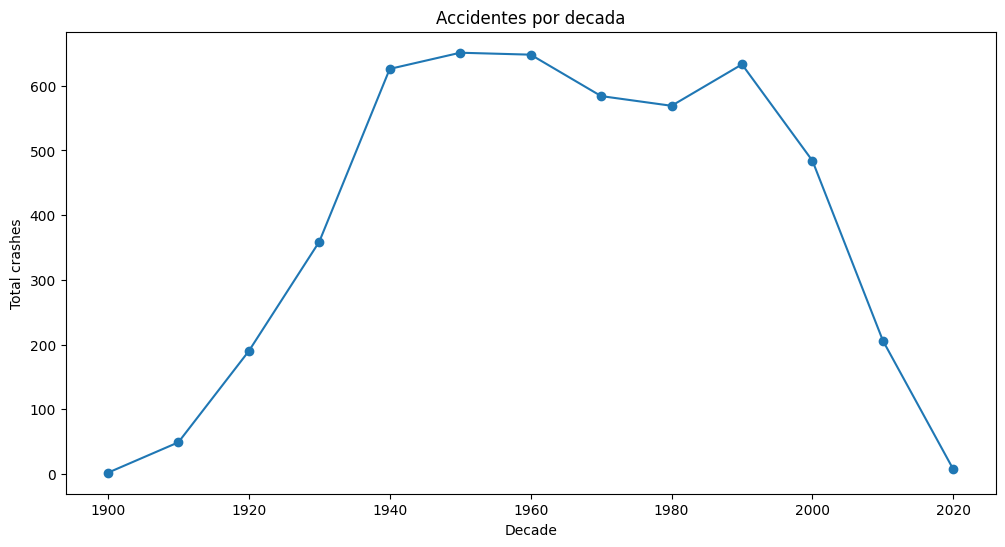

In [64]:
# Graficamos los resultado obtenidos
result.plot(figsize=[12, 6], title='Accidentes por decada', ylabel='Total crashes', marker="o")

#### category

In [65]:
# Agrupamos por tipo de vuelo
result = df.groupby('category', observed=False).size()
result

category
air_show            2
charter             1
commercial       4583
demonstration       3
helicopter         34
local               1
mail_service       38
military          196
no_category         3
positioning         2
private            79
sightseeing        11
survey              1
taxi               12
testing            16
training           16
dtype: int64

<Axes: title={'center': 'Accidentes por tipo de vuelo'}, xlabel='category', ylabel='Total crashes'>

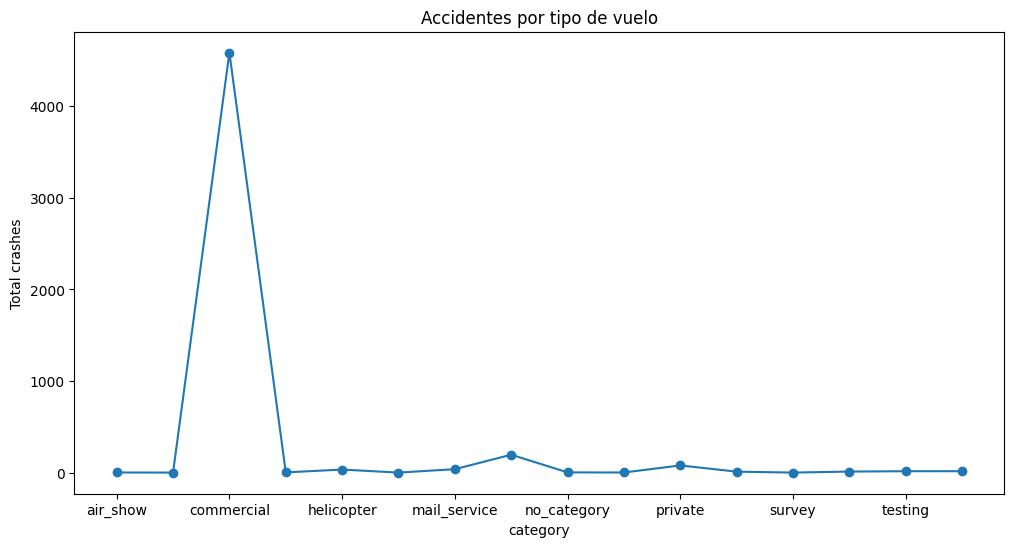

In [66]:
# Graficamos los resultado obtenidos
result.plot(figsize=[12, 6], title='Accidentes por tipo de vuelo', ylabel='Total crashes', marker="o")

#### operador

In [67]:
# Agrupamos por operador
result = df.groupby('operador', observed=False).size()
result

operador
46826/109                         1
?                                10
A B Aerotransport                 2
AB Aerotransport                  4
ACES Colombia                     3
                                 ..
Zantop International Airlines     1
de Havilland Air Service          1
de Havilland Dove                 1
u.s. Air Force                    1
èkoda (India) Ltd                 1
Length: 2268, dtype: int64

In [68]:
result_filtered = result[result > 10]
result_filtered = result_filtered.sort_values(ascending=False)

result_filtered

operador
Aeroflot                                 253
Military - U.S. Air Force                141
Air France                                74
Deutsche Lufthansa                        63
United Air Lines                          44
                                        ... 
Canadian Pacific Air Lines                11
Tarom                                     11
Military - Royal Australian Air Force     11
Flying Tiger Line                         11
Swissair                                  11
Length: 61, dtype: int64

<Axes: title={'center': 'Accidentes por operador (filtrado a > 10 accidentes)'}, xlabel='operador', ylabel='Total crashes'>

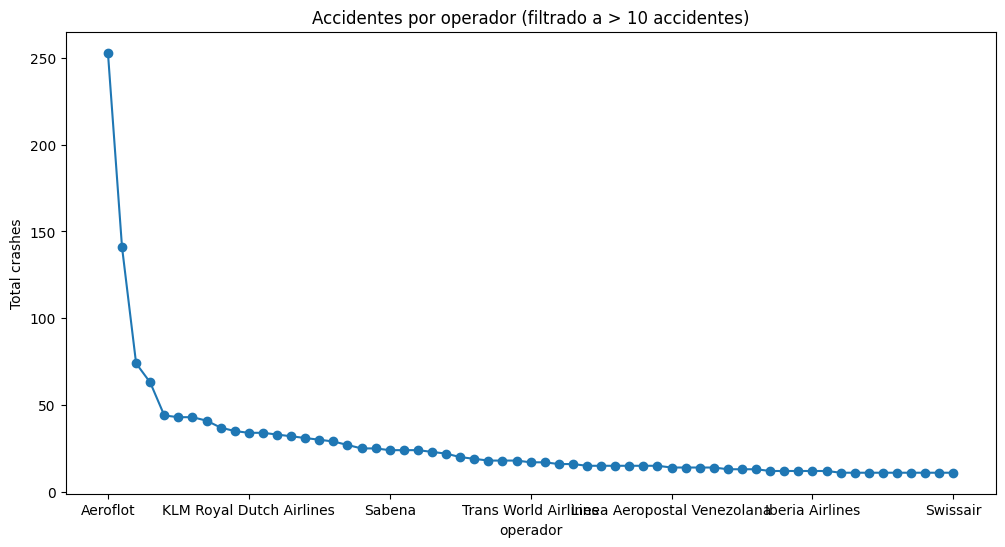

In [69]:
# Graficamos los resultado obtenidos
result_filtered.plot(figsize=[12, 6], title='Accidentes por operador (filtrado a > 10 accidentes)', ylabel='Total crashes', marker="o")

## Comprobación de hipótesis

**Las comprobaciones serán llevadas a cabo mediante el uso de la herramienta Power Bi**

## Conclusión

### Hipótesis 1

**Con base en los datos proporcionados, la tasa de fatalidad de la tripulación en la década de los 2010 (3.55) es ligeramente mayor que la tasa de fatalidad en la década de los 2000 (3.233). Esta diferencia sugiere que, en lugar de una disminución del 10% en la tasa de fatalidad, hubo un aumento en la tasa de fatalidad en la última década en comparación con la década anterior. Por lo tanto, la hipótesis de una disminución del 10% en la tasa de fatalidad no se cumple en este contexto.**

**Es importante tener en cuenta que estos datos pueden ser un punto de partida para un análisis más completo y que otros factores podrían estar influyendo en esta tendencia. Sería necesario llevar a cabo un estudio más detallado para comprender completamente las razones detrás de este cambio en la tasa de fatalidad de la tripulación en la industria de la aviación.**

### Hipótesis 2

**Con base en los datos proporcionados, la hipótesis de que existe una relación entre las diferentes categorías de accidentes aéreos y que esta relación ha llevado a una disminución en la cantidad de accidentes en la última década en comparación con la década anterior se respalda sólidamente. La disminución del 52.96% en la cantidad de accidentes aéreos entre las décadas de 2000 (con 506 accidentes) y 2010 (con 238 accidentes) es una reducción significativa que sugiere un impacto positivo en la seguridad de la industria de la aviación durante ese período.**

**Este resultado es alentador y apunta a mejoras significativas en la seguridad de la aviación, lo que es fundamental para la protección de la vida y la integridad de los pasajeros y la tripulación. No obstante, es importante reconocer que este análisis se centra en la cantidad de accidentes y no considera otros factores que podrían influir en esta disminución. Un análisis más profundo sería necesario para comprender completamente las razones detrás de esta reducción y evaluar la efectividad de las medidas de seguridad implementadas en la industria de la aviación en la última década.**